In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
import pandas as pd

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X = iris.data 
y = iris.target

In [55]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
print(X.shape)
print(y.shape)

(150, 2)
(150,)


Text(0, 0.5, 'Sepal width')

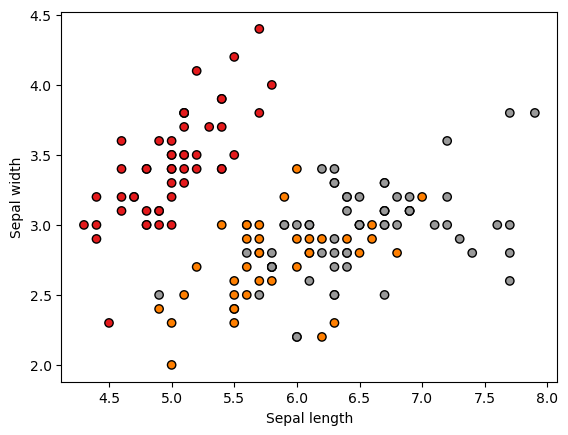

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
print('Origin: ', X.shape, y.shape)
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Origin:  (150, 4) (150,)
Train:  (120, 4) (120,)
Test:  (30, 4) (30,)


In [22]:
def normalize(x):
    return x/x.max(axis=0)

In [23]:
X_train = normalize(X_train)
X_test = normalize(X_test)

Text(0, 0.5, 'Sepal width')

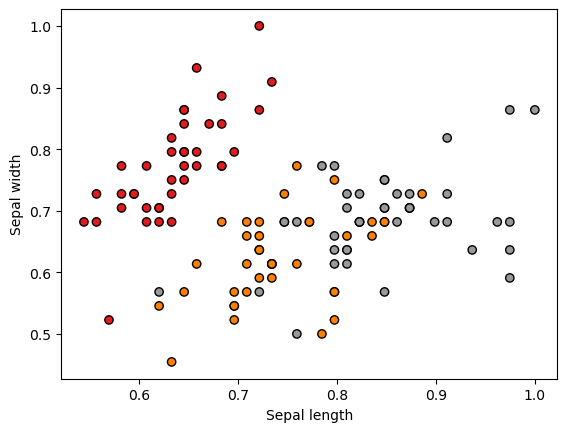

In [41]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor= "k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")


In [15]:
from sklearn.decomposition import PCA
def visualize_3d(X):
    # plot the first three PCA dimensions
    fig = plt.figure(1, figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

    X_reduced = PCA(n_components=3).fit_transform(X)
    ax.scatter(
        X_reduced[:, 0],
        X_reduced[:, 1],
        X_reduced[:, 2],
        c=y,
        cmap=plt.cm.Set1,
        edgecolor="k",
        s=40,
    )

    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])

    plt.show()

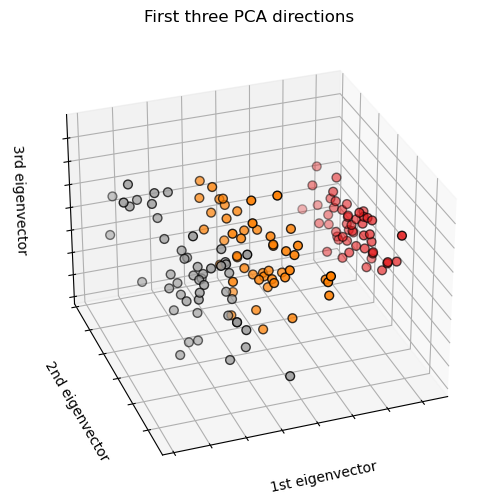

In [16]:
visualize_3d(X)

In [43]:
y_pred = np.random.randint(3, size=y_test.shape)

print('y_test: ', y_test[:10])
print('y_pred: ', y_pred[:10])

y_test:  [2 1 0 2 0 2 0 1 1 1]
y_pred:  [1 1 1 0 0 1 1 1 1 2]


In [44]:
accuracy_score(y_test[:10], y_pred[:10])

0.4

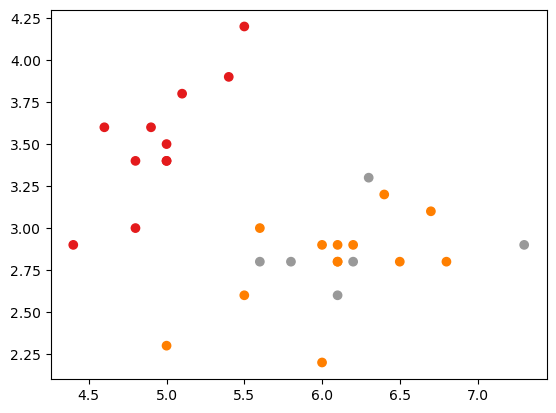

In [9]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1, edgecolor= None)

In [22]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['label'] = pd.Series(iris.target_names[y], dtype='category')

In [23]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [24]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

<AxesSubplot:xlabel='petal length', ylabel='petal width'>

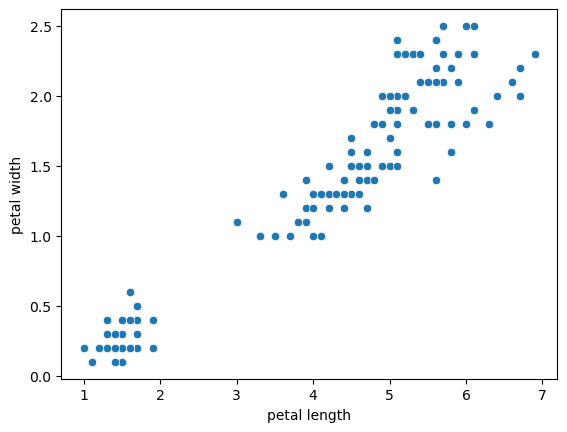

In [26]:
import seaborn as sns

sns.scatterplot(data=df, x='petal length', y='petal width')

In [27]:
palette = {'setosa': 'orange', 'versicolor': 'green', 'virginica': 'purple'}

<AxesSubplot:xlabel='petal length', ylabel='petal width'>

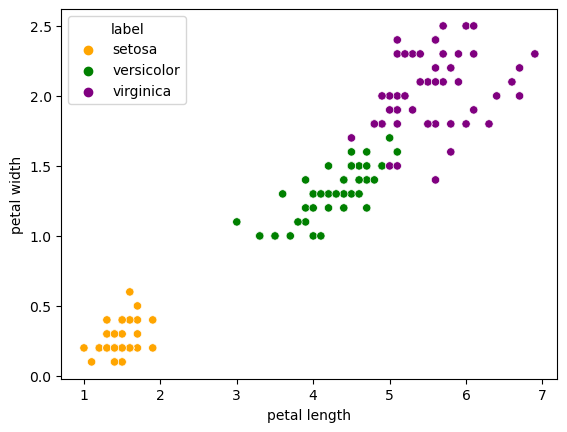

In [28]:
sns.scatterplot(data=df, x='petal length', y='petal width', hue='label', palette=palette)

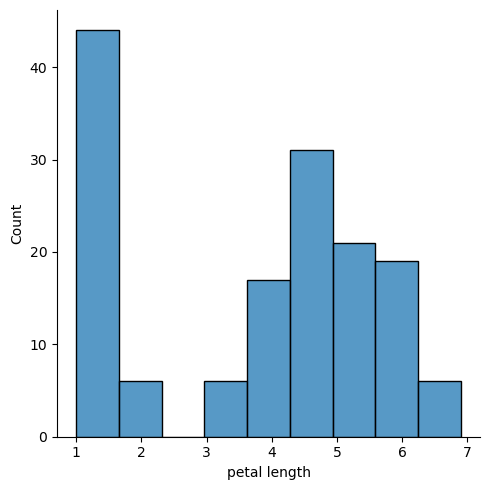

In [29]:
sns.displot(data=df, x='petal length')

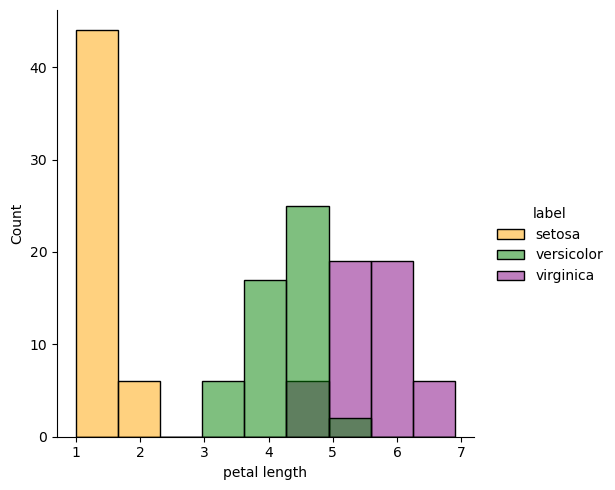

In [30]:
sns.displot(data=df, x='petal length', hue='label', palette=palette)

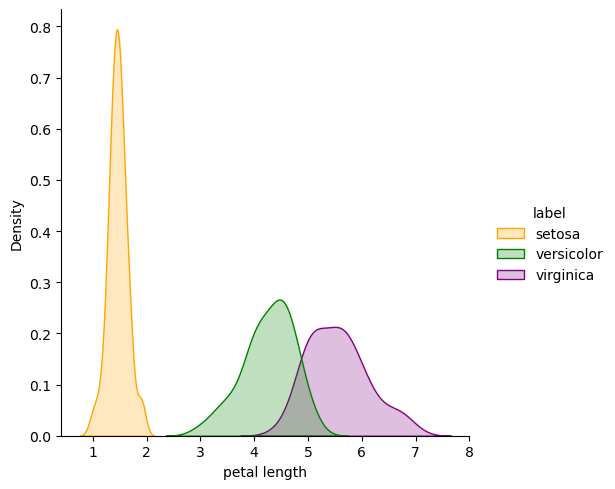

In [31]:
sns.displot(data=df, x='petal length', hue='label', palette=palette, kind='kde', fill=True)

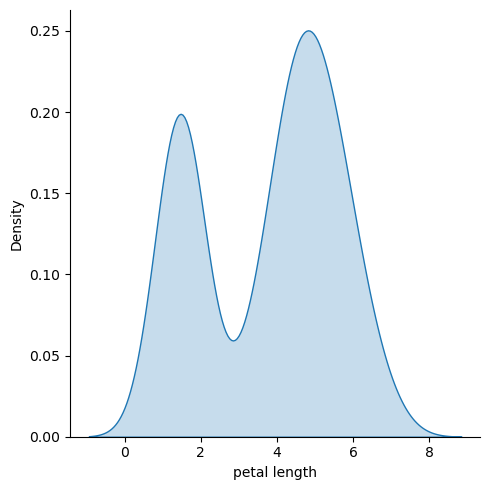

In [32]:
sns.displot(data=df, x='petal length', palette=palette, kind='kde', fill=True)

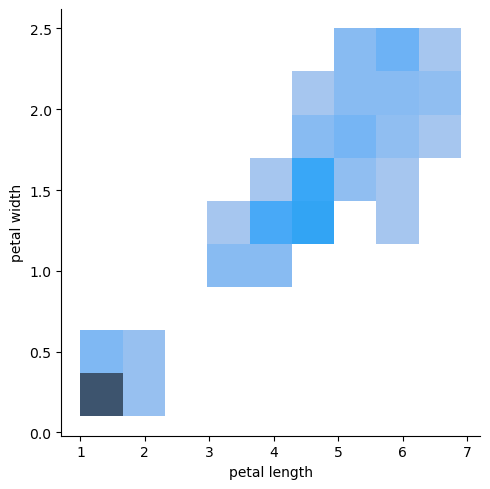

In [33]:
sns.displot(data=df, x='petal length', y='petal width')

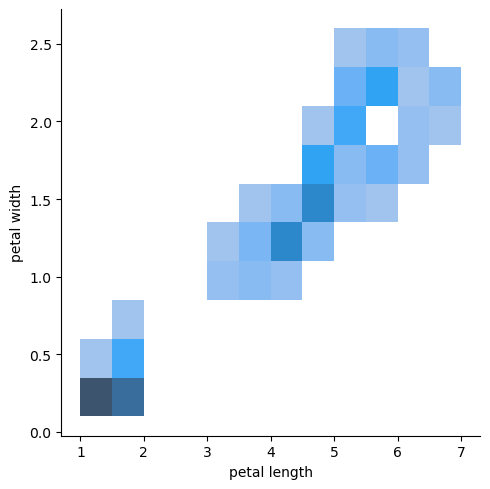

In [34]:
sns.displot(data=df, x='petal length', y='petal width', binwidth=(0.5, 0.25))

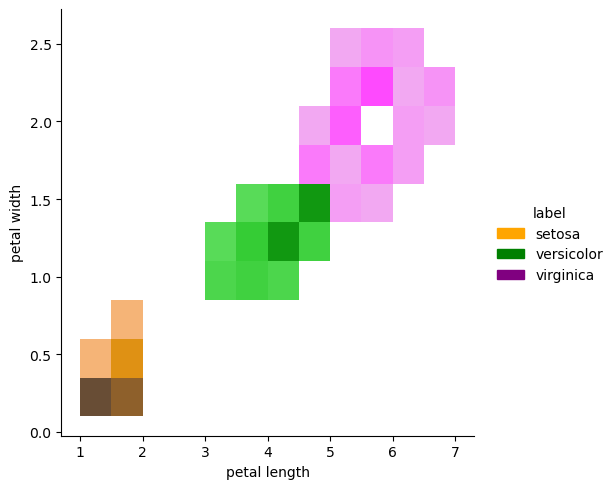

In [35]:
sns.displot(data=df, x='petal length', y='petal width', binwidth=(0.5, 0.25), hue='label', palette=palette)

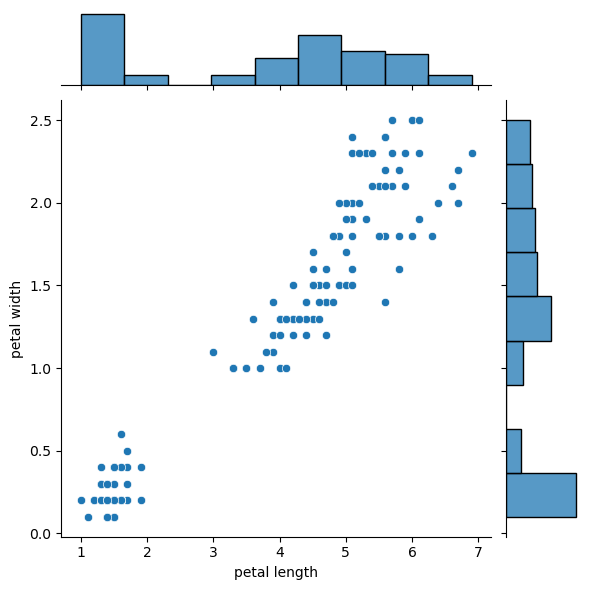

In [36]:
sns.jointplot(data=df, x='petal length', y='petal width')

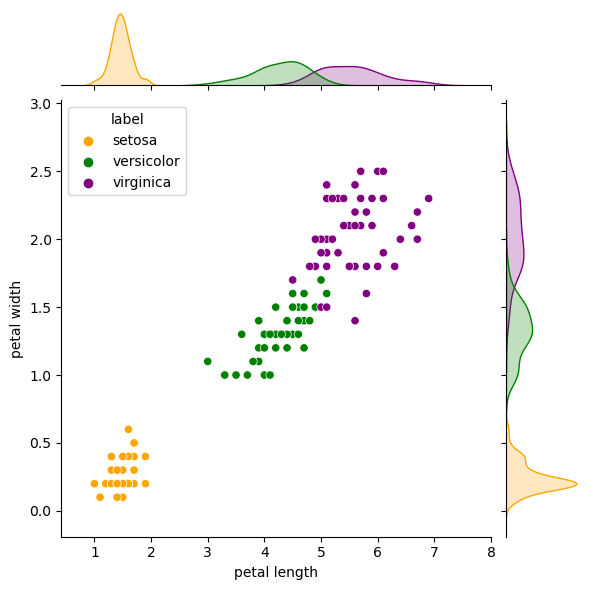

In [37]:
sns.jointplot(data=df, x='petal length', y='petal width', hue='label', palette=palette)

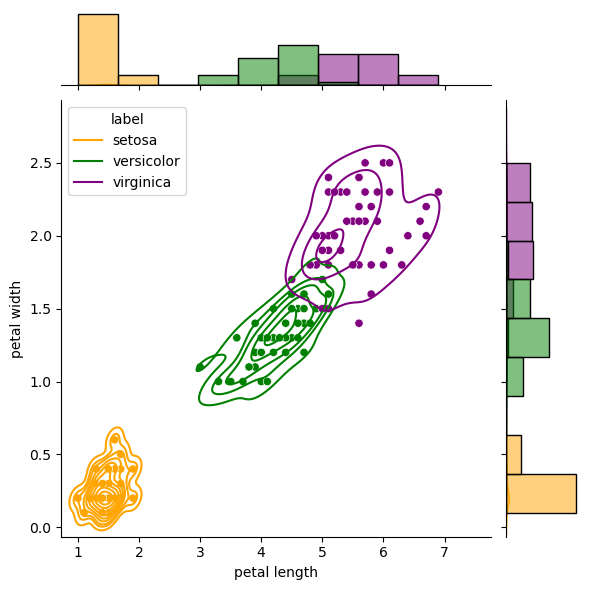

In [38]:
g = sns.jointplot(data=df, x='petal length', y='petal width', hue='label', palette=palette)
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

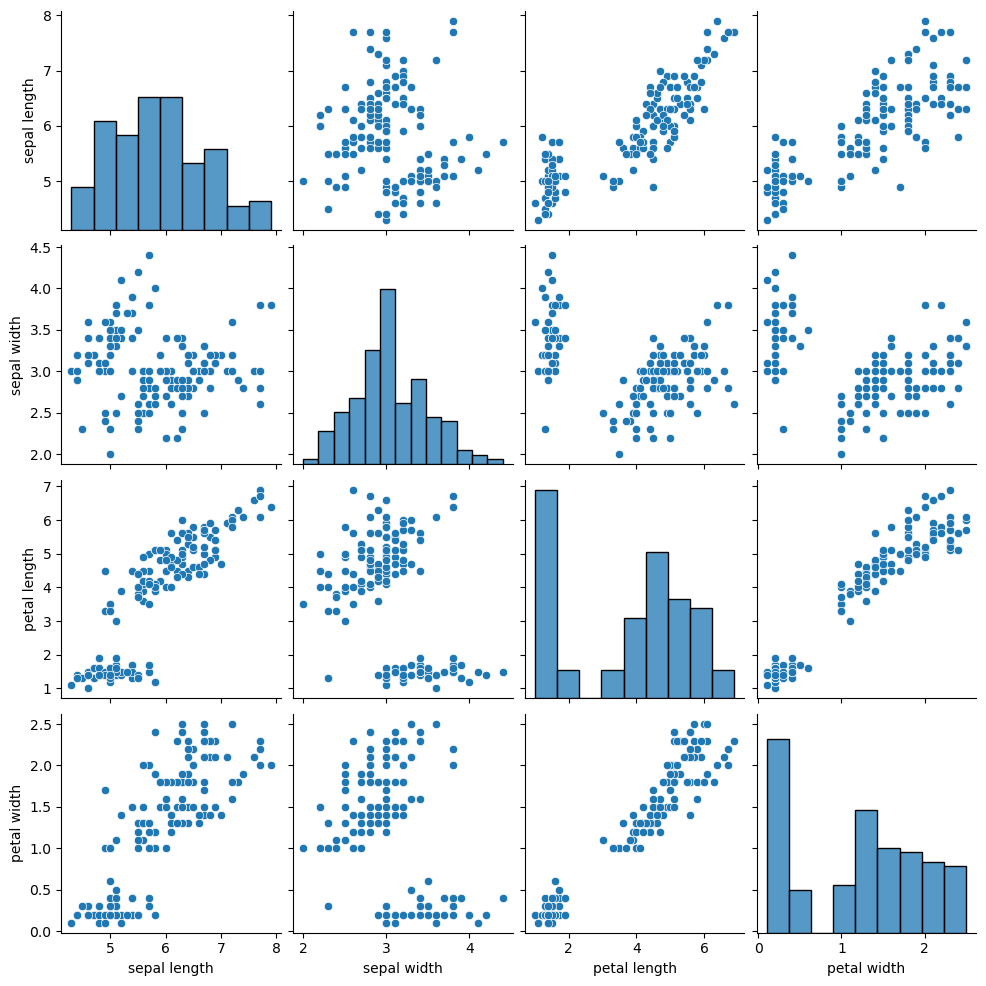

In [39]:
sns.pairplot(data=df, vars=df.columns[0:4])

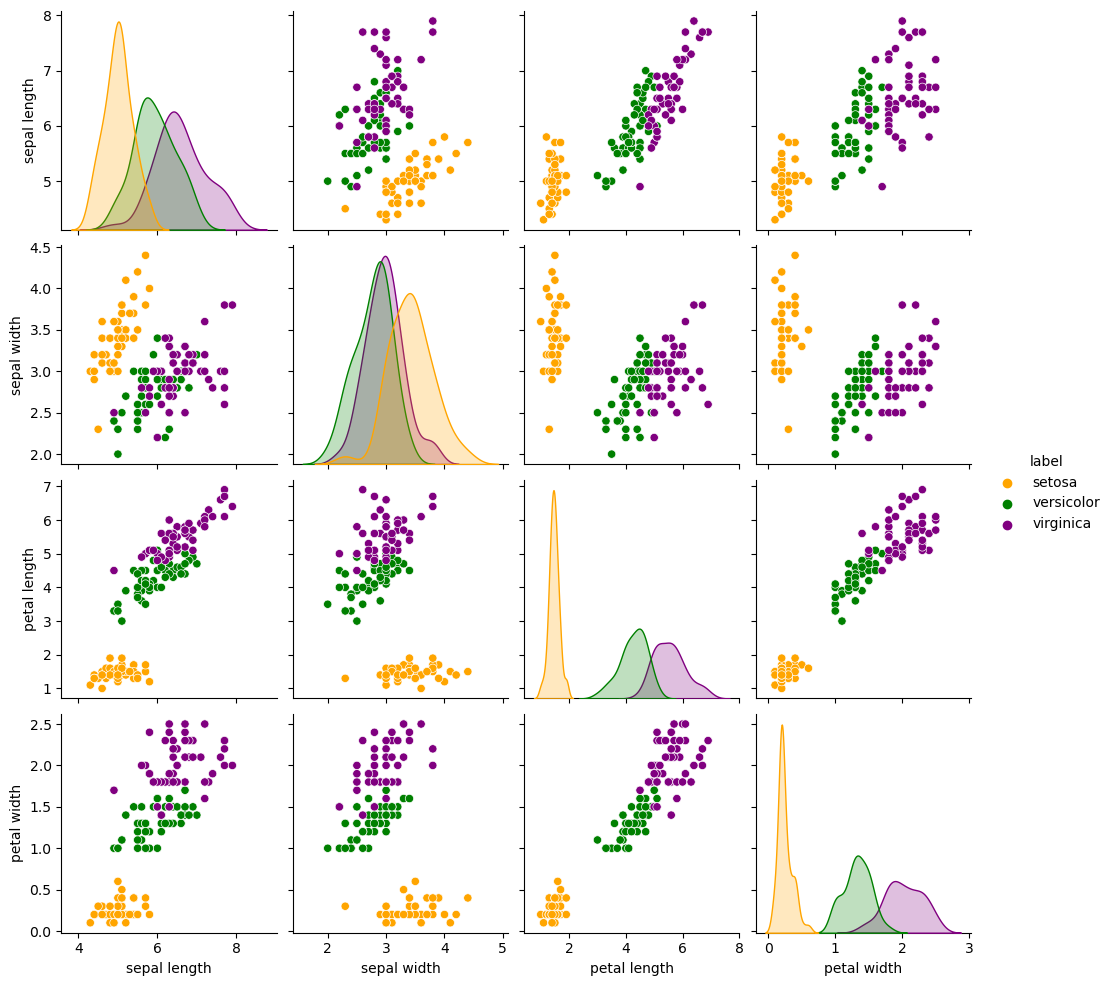

In [40]:
sns.pairplot(data=df, vars=df.columns[0:4], hue='label', palette=palette)
# plt.savefig('iris.pdf')

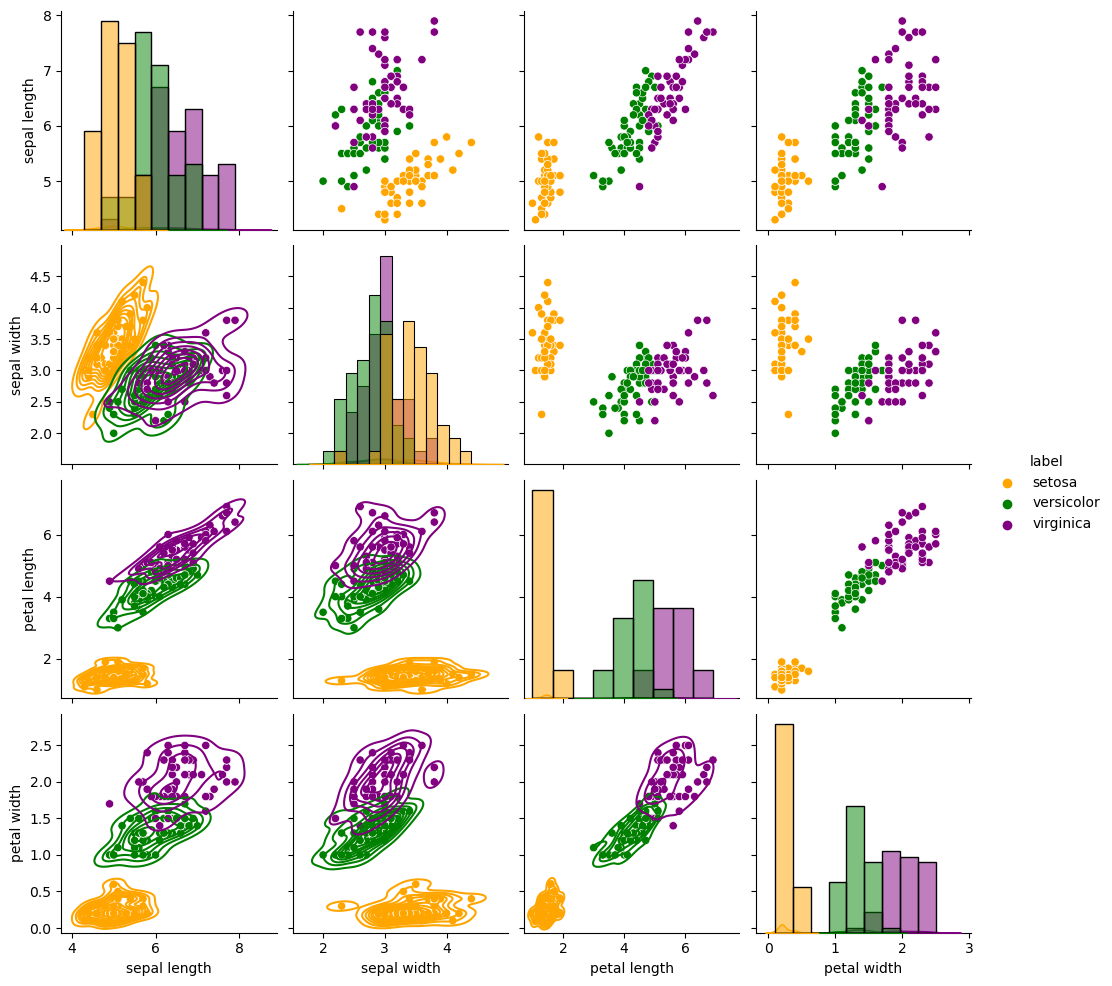

In [41]:
g = sns.pairplot(data=df, vars=df.columns[0:4], hue='label', palette=palette)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)